In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("hmeq.csv")

# Feature list

**LOAN** - Amount of the loan request <br>
**MORTDUE** - Amount due on existing mortgage<br>
**VALUE** - Value of current property<br>
**REASON** - DebtCon = debt combine HomeImp = home improvement<br>
**JOB** - Six occupational categories<br>
**YOJ** - Years at present job<br>
**DEROG** - Number of major derogatory reports<br>
**DELINQ** - Number of delinquent credit lines<br>
**CLAGE** - Age of oldest trade line in months<br>
**NINQ** - Number of recent credit lines<br>
**CLNO** - Number of credit lines<br>
**DEBTINC** - Debt-to-income ratio<br>

In [3]:
data.head(10)#BAD - 0 paid the loan, 1 defaulted  on the loan

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [5]:
data = data.fillna(data.mean())

In [6]:
data['REASON'] = data['REASON'].fillna('Other')
data['JOB'] = data['JOB'].fillna('Other')

In [7]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


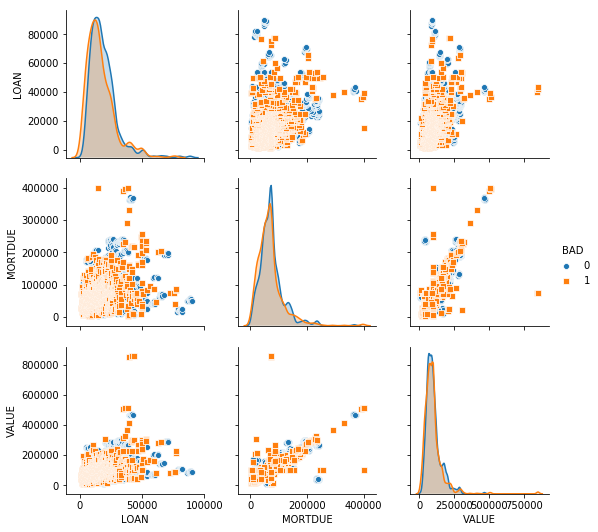

In [8]:
sns.pairplot(data.drop(['REASON','JOB'],axis=1),hue='BAD',vars=['LOAN','MORTDUE','VALUE'],diag_kind="kde",markers=['o','s'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


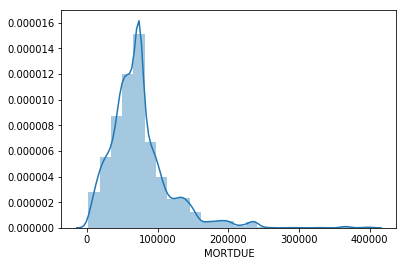

In [9]:
sns.distplot(data['MORTDUE'],bins=25)

In [10]:
data.groupby('BAD').mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,
0,19028.107315,74736.984556,102594.718103,9.132995,0.149882,0.266887,186.653519,1.046727,21.316294,33.306238
1,16922.119428,69843.832795,98491.043253,8.076701,0.674641,1.181968,152.130415,1.745125,21.215049,35.680601


In [11]:
data.REASON = pd.Categorical(data.REASON)
data.REASON = data.REASON.cat.codes

In [12]:
data.JOB = pd.Categorical(data.JOB)
data.JOB = data.JOB.cat.codes
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,1,2,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,1,2,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,1,2,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,2,2,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,1,1,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
5,1,1700,30548.0000,40320.000000,1,2,9.000000,0.00000,0.000000,101.466002,1.000000,8.000000,37.113614
6,1,1800,48649.0000,57037.000000,1,2,5.000000,3.00000,2.000000,77.100000,1.000000,17.000000,33.779915
7,1,1800,28502.0000,43034.000000,1,2,11.000000,0.00000,0.000000,88.766030,0.000000,8.000000,36.884894
8,1,2000,32700.0000,46740.000000,1,2,3.000000,0.00000,2.000000,216.933333,1.000000,12.000000,33.779915
9,1,2000,73760.8172,62250.000000,1,4,16.000000,0.00000,0.000000,115.800000,0.000000,13.000000,33.779915


In [13]:
X = data.drop('BAD', axis=1)#features
Y = data['BAD']#target

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores.mean())

0.7869047472619617


Text(0,0.5,'Cross-Validated Accuracy')

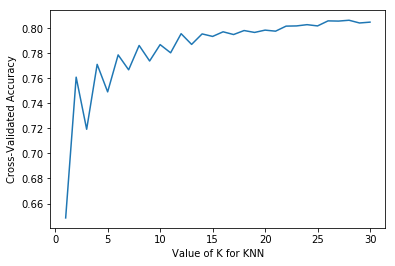

In [15]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [16]:
from sklearn.model_selection import GridSearchCV
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, Y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


,mean_test_score,std_test_score,params
0,0.648490,0.071211,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.648490,0.071211,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.760906,0.027214,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.648490,0.071211,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.719295,0.047388,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.707215,0.050754,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.771141,0.020182,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.708389,0.052450,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.749161,0.025649,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.736745,0.036793,"{'n_neighbors': 5, 'weights': 'distance'}"


In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, Y, cv=10, scoring='accuracy').mean())

0.7989945823528561


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=50,random_state=1,n_jobs=-1)
print(cross_val_score(rfc, X, Y, cv=10, scoring='accuracy').mean())

0.8205703200642167


Text(0,0.5,'Cross-Validated Accuracy')

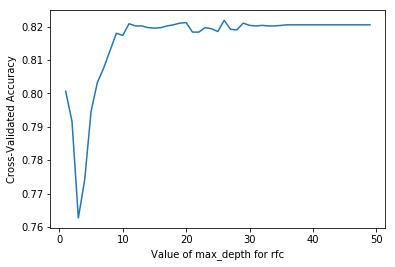

In [39]:
d_range = list(range(1, 50))
d_scores = []
for d in d_range:
    rfc = RandomForestClassifier(n_estimators=100, max_depth=d,random_state=1,n_jobs=-1)
    scores = cross_val_score(rfc, X, Y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())


# plot the value of max_depth for rfc (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of max_depth for rfc')
plt.ylabel('Cross-Validated Accuracy')

In [20]:
max(Y.mean(), 1 - Y.mean())#null classfier

0.800503355704698

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, Y_pred))

[[1168    3]
 [ 301   18]]


In [22]:
from sklearn.cross_validation import cross_val_predict
Y_pred = cross_val_predict(knn, X, Y, cv=10)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y, Y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[4707   64]
 [1103   86]]


**Random forest classification analasys**

In [23]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=50,random_state=1,n_jobs=-1)
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [24]:
print(metrics.accuracy_score(Y_test, Y_pred))#accuracy 

0.9174496644295302


In [25]:
print(1 - metrics.accuracy_score(Y_test, Y_pred))#classifcation error

0.08255033557046976


In [26]:
print(metrics.recall_score(Y_test, Y_pred))#sensitivey to TRUE values TPR

0.6927899686520376


In [27]:
print(FP / float(TN + FP)) #FPR

0.02134927412467976


In [28]:
print(metrics.precision_score(Y_test, Y_pred))

0.8983739837398373


In [29]:
df_confusion = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted     0    1   All
Actual                    
0          1146   25  1171
1            98  221   319
All        1244  246  1490


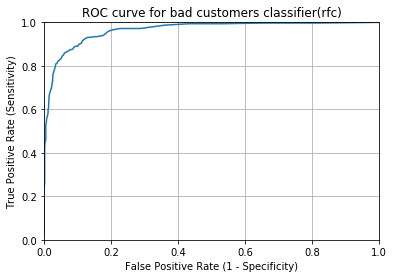

In [30]:
Y_pred_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for bad customers classifier(rfc)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [31]:
cross_val_score(rfc, X, Y, cv=10, scoring='roc_auc').mean()

0.8940626913839077

**Logistic Regression treshold**

Text(0,0.5,'Frequency')

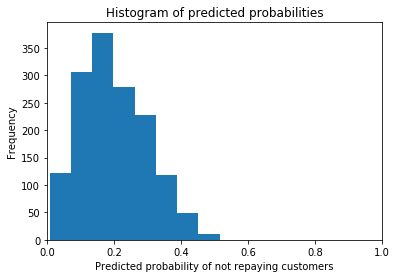

In [32]:
logreg.fit(X_train,Y_train)
Y_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.hist(Y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of not repaying customers')
plt.ylabel('Frequency')

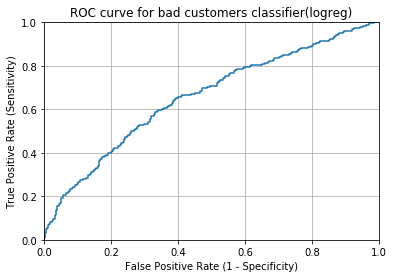

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for bad customers classifier(logreg)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [34]:
Y_pred = logreg.predict(X_test)
print(metrics.confusion_matrix(Y_test, Y_pred))
df_confusion = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[1170    1]
 [ 318    1]]


In [35]:
df_confusion

Predicted,0,1,All
Actual,,,
0,1170,1,1171
1,318,1,319
All,1488,2,1490


In [36]:
cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc').mean()

0.6635696593580973